<a href="https://colab.research.google.com/github/alifele/Computational-Physics/blob/main/Biophysics/PBPK%20for%20DOTATATE/Benchmark_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def setMatrix(paramDict):
    p = paramDict("p")
    q = paramDict("q")
    r = paramDict("r")
    s = paramDict("s")
    mat = np.array([[-p,r,0],[p,-(r+q),s],[0,q,-s]])
    return mat

In [5]:
def F(t,Phi):
    return 

In [213]:
class System:
    def __init__(self, paramDict, configDict, initDict):

        self.Phi = initDict["Phi0"]
        self.paramDict = paramDict

        self.systemMat = np.zeros((3,3))
        self.setMatrix()

        self.N_t = 1000
        self.tmax = configDict["tmax"]
        self.h = self.tmax/self.N_t
        self.t = 0
        self.tList = np.zeros(self.N_t)
        self.PhiList = np.zeros((self.N_t, self.Phi.shape[0]))


    def I(self, t):
        return np.array([0,0,0])


    def setMatrix(self):
        p = self.paramDict["p"]
        q = self.paramDict["q"]
        r = self.paramDict["r"]
        s = self.paramDict["s"]
        rel = self.paramDict["rel"]
        self.systemMat = np.array([[-p,r,0],[p,-(r+q),s],[0,q,-(s+rel)]])


    def F(self, t, Phi):
        return np.matmul(self.systemMat, self.Phi) + self.I(t)


    def RK_iterate(self):
        k1 = self.F(self.t, self.Phi)
        k2 = self.F(self.t+self.h/2, self.Phi+k1*self.h/2)
        k3 = self.F(self.t+self.h/2, self.Phi+k2*self.h/2)
        k4 = self.F(self.t+self.h, self.Phi+k3*self.h)
        self.Phi += self.h/6*(k1+2*k2+2*k3+k4)


    def solve(self):
        for i in range(self.N_t):
            self.PhiList[i,:] = self.Phi
            self.tList[i] = self.t
            self.RK_iterate()
            self.t += self.h

        return self.tList, self.PhiList


    def sample(self, N_samp, noise_std): 
        '''
        This function adds guassian noise to the simulated data and then samples
        it
        '''
        PhiList = self.PhiList + np.random.randn(*self.PhiList.shape)*noise_std
        samp_indeces = np.ceil(np.linspace(0,self.N_t-1,N_samp))
        samp_indeces = samp_indeces.astype("int")
        return self.tList[samp_indeces], PhiList[samp_indeces,:]
            





In [218]:
paramDict = {"p":1,
             "q":1,
             "r":1,
             "s":1,
             "rel":0.5}

configDict = {"tmax":10}

initDict = {"Phi0": np.array([10,0,0], dtype="float")}


sys = System(paramDict, configDict, initDict)
tList,PhiList = sys.solve()
tListSamp, PhiListSamp = sys.sample(20,0.1)


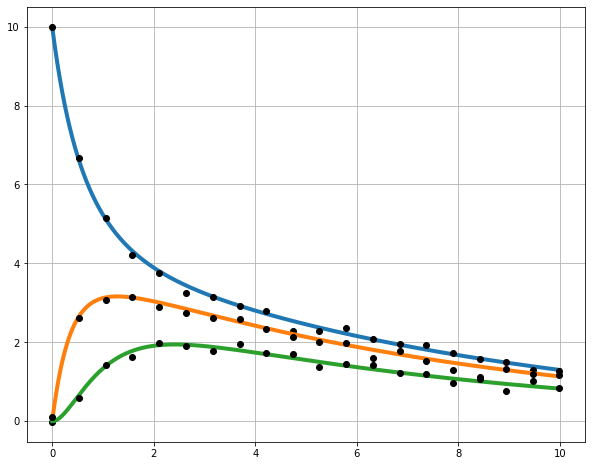

In [219]:
fig = plt.figure(figsize=(10,8))
for i in range(3):
    plt.plot(tList,PhiList[:,i], lw=4)
    plt.plot(tListSamp, PhiListSamp[:,i],'ko')
    plt.grid()